In [1]:
# sentiment_analysis_model.py
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the IMDb dataset
df = pd.read_csv('imdb-dataset.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

# Create a pipeline with CountVectorizer and Naive Bayes classifier
model = make_pipeline(CountVectorizer(), MultinomialNB())

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

# Print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy}')

# Print additional analysis
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Save the model to a .pkl file
joblib.dump(model, 'sentiment_analysis_model.pkl', protocol=4)

# Test the model with various inputs
example_reviews = [
    "This movie is amazing! I loved every moment of it.",
    "The plot was confusing, and the acting was not great.",
    "A masterpiece! The cinematography and acting were superb.",
    "I couldn't follow the storyline, and the characters were poorly developed."
]

print("\nPredictions for Example Reviews:")
for review in example_reviews:
    prediction = model.predict([review])[0]
    print(f"Review: '{review}'\nSentiment: {prediction}\n")


Model Accuracy: 0.8488

Classification Report:
              precision    recall  f1-score   support

    negative       0.83      0.88      0.85      4961
    positive       0.87      0.82      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000


Confusion Matrix:
[[4361  600]
 [ 912 4127]]

Predictions for Example Reviews:
Review: 'This movie is amazing! I loved every moment of it.'
Sentiment: positive

Review: 'The plot was confusing, and the acting was not great.'
Sentiment: negative

Review: 'A masterpiece! The cinematography and acting were superb.'
Sentiment: positive

Review: 'I couldn't follow the storyline, and the characters were poorly developed.'
Sentiment: negative



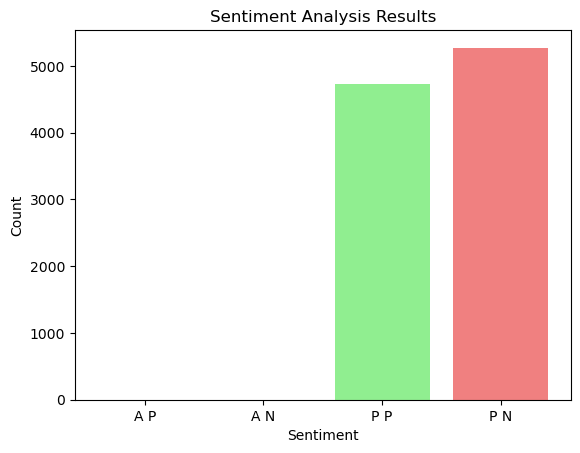

In [3]:
# Assuming y_test and y_pred are binary (0 or 1) sentiment labels
positive_count = sum(y_test == 1)
negative_count = sum(y_test == 0)

# Map string labels to numerical values in y_pred
label_mapping = {'positive': 1, 'negative': 0}
y_pred_numeric = np.vectorize(label_mapping.get)(y_pred)

predicted_positive_count = sum(y_pred_numeric == 1)
predicted_negative_count = sum(y_pred_numeric == 0)

# Create a bar graph: 'Actual Positive', 'Actual Negative', 'Predicted Positive', 'Predicted Negative'
labels = ['A P', 'A N', 'P P', 'P N']
counts = [positive_count, negative_count, predicted_positive_count, predicted_negative_count]

plt.bar(labels, counts, color=['green', 'red', 'lightgreen', 'lightcoral'])
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


Time Consumption:

a. Timing Predictions: Use the time module to measure the time it takes to make predictions on the test data. This is crucial, especially if your model needs to be deployed in a real-time setting.

b. Batch Processing: If you plan to deploy this model in a production environment, consider testing its performance with a batch of inputs.

In [4]:
import time

start_time = time.time()
y_pred = model.predict(X_test)
end_time = time.time()

time_taken = end_time - start_time
print(f"Time taken for predictions: {time_taken} seconds")


Time taken for predictions: 3.872020721435547 seconds


Time taken for predictions: 3.851592540740967 seconds


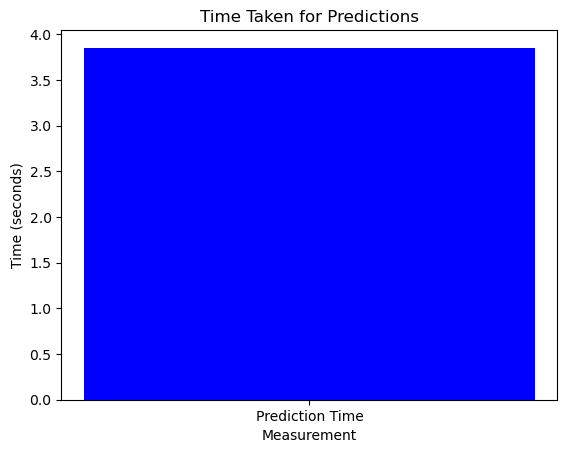

In [5]:
# Measure time taken for predictions
start_time = time.time()
y_pred = model.predict(X_test)
end_time = time.time()

time_taken = end_time - start_time
print(f"Time taken for predictions: {time_taken} seconds")

# Plot the time taken
labels = ['Prediction Time']
times = [time_taken]

plt.bar(labels, times, color=['blue'])
plt.title('Time Taken for Predictions')
plt.xlabel('Measurement')
plt.ylabel('Time (seconds)')
plt.show()

Cross-Validation:

a. Cross-Validation Scores: Instead of a single train-test split, you might perform k-fold cross-validation to get a more robust estimate of your model's performance.

In [6]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", scores)


Cross-Validation Scores: [0.84575  0.850875 0.85675  0.840125 0.846   ]


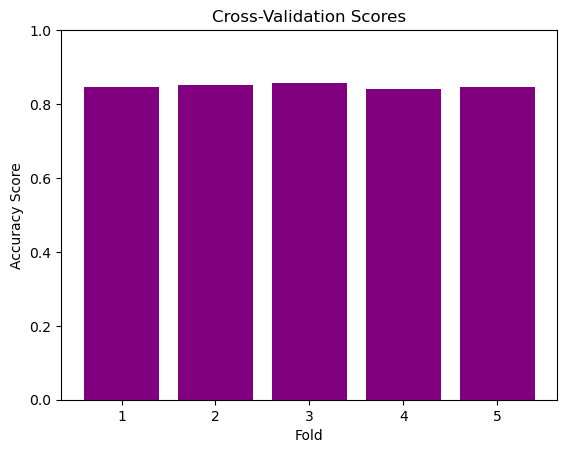

In [7]:
# Plot the cross-validation scores
plt.bar(range(1, len(scores)+1), scores, color='purple')
plt.title('Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)  # Set y-axis limit to the range of accuracy scores (0 to 1)
plt.show()

Hyperparameter Tuning:

a. Grid Search: If applicable, you might perform a grid search to find the optimal hyperparameters for your model.

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {'multinomialnb__alpha': [0.1, 1.0, 10.0]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'multinomialnb__alpha': 0.1}


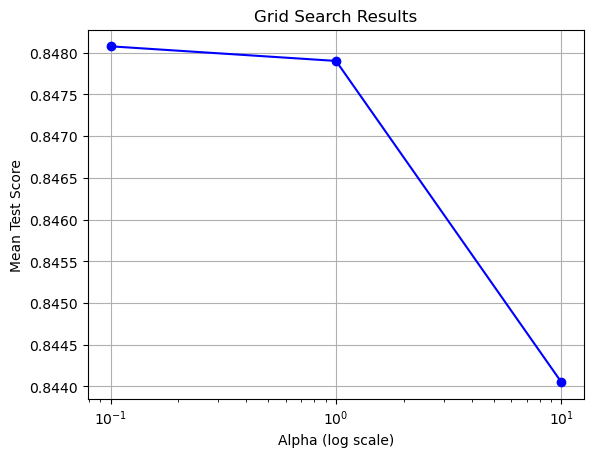

In [9]:
# Extract hyperparameters and corresponding scores
alphas = [params['multinomialnb__alpha'] for params in grid_search.cv_results_['params']]
scores = grid_search.cv_results_['mean_test_score']

# Plot the results
plt.semilogx(alphas, scores, marker='o', linestyle='-', color='blue')
plt.title('Grid Search Results')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Mean Test Score')
plt.grid(True)
plt.show()

Accuracy:

Formula:
Number of Correct Predictions
____________________________________
Total Number of Predictions
​

Interpretation: The proportion of correctly classified instances.

In [10]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.8488


Precision:

Formula:
True Positives
_________________________________
True Positives + False Positives
​

Interpretation: The ability of the model to avoid labeling negative instances as positive.

In [11]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, pos_label='positive')  # Specify positive label
print(f'Precision: {precision}')


Precision: 0.8730696001692405


Recall (Sensitivity):

Formula:
True Positives
_____________________________________
True Positives + False Negatives
​

Interpretation: The ability of the model to identify all relevant instances.

In [12]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred, pos_label='positive')  # Specify positive label
print(f'Recall: {recall}')


Recall: 0.8190117086723556


F1-Score:

Formula:
2 ×  Precision × Recall
    ____________________
      Precision + Recall

​

Interpretation: The harmonic mean of precision and recall.

In [13]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, pos_label='positive')  # Specify positive label
print(f'F1-Score: {f1}')


F1-Score: 0.8451771451976243


Confusion Matrix:

Interpretation: A table that shows the number of true positives, true negatives, false positives, and false negatives.

In [14]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)


Confusion Matrix:
[[4361  600]
 [ 912 4127]]


Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC):

Interpretation: Useful for binary classification problems. The ROC curve shows the trade-off between true positive rate and false positive rate.

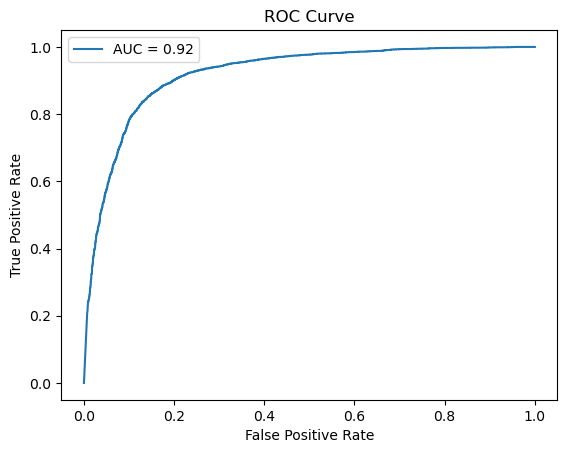

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1], pos_label='positive')
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
